In [3]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

In [4]:
df = pd.read_csv("./weight-height.csv")
df.head(10)

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
5,Male,67.253016,152.212156
6,Male,68.785081,183.927889
7,Male,68.348516,167.971110
8,Male,67.018950,175.929440
9,Male,63.456494,156.399676


Text(0, 0.5, 'Height')

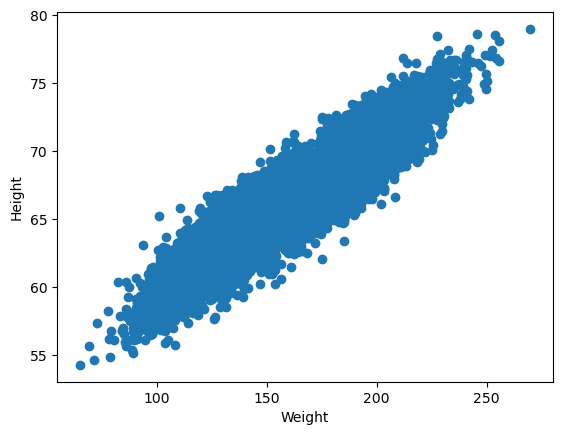

In [5]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')

**Input Variable**: The data used to make predictions in a machine learning model.<br>


**Target Variable**: The outcome the model is trained to predict.

In [6]:
X = df[['Weight']] # input variable
y = df[['Height']] # target variable

**random_state** - Using a random state while splitting a dataset into train and test sets ensures that the split is reproducible, so you get the same results every time you run the code

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=42)

**Standard Scaler** - Using a Standard Scaler transforms your data to have a mean of 0 and a standard deviation of 1, which helps algorithms perform better by making features more comparable

**Standard Deviation** - Standard deviation is a measure of how spread out the values in a dataset are. It tells you, on average, how much each value differs from the mean (average) of the dataset

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

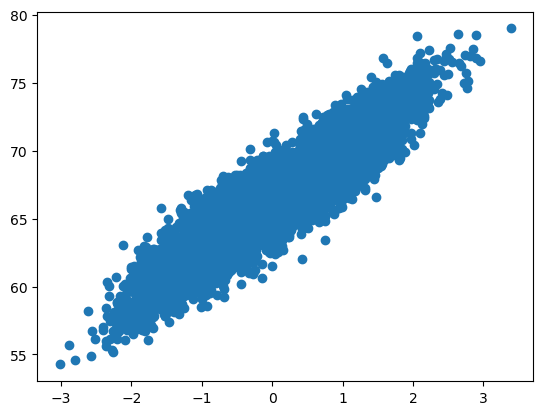

In [9]:
plt.scatter(X_train , y_train)

 **Linear regression** - It is a method to find the straight line that best fits a set of data points. It predicts the value of a dependent variable (target) based on the value of one or more independent variables (inputs)

In [10]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

**Coefficient**: The coefficient (also called the slope) shows how much the dependent variable changes for a one-unit change in the independent variable.

**Intercept**: The intercept is the value of the dependent variable when all the independent variables are zero. It's where the line crosses the y-axis.

In [11]:
regressor.coef_ , regressor.intercept_

(array([[3.55479288]]), array([66.35968141]))

![Line Equation](https://thirdspacelearning.com/wp-content/uploads/2021/10/Equation-of-a-Line-Featured-Image.png) <br>
Source - thirdspacelearning.com


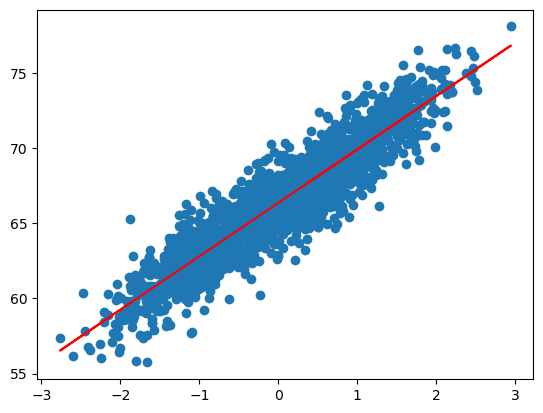

In [13]:
plt.scatter(X_test,y_test)
plt.plot(X_test,regressor.predict(X_test),"r")

In [14]:
y_test_pred = regressor.predict(X_test)

 **Performance Metrics** - They are measures used to evaluate how well a machine learning model predicts or classifies data.

In [16]:
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score # performance metrices
mse_test = mean_squared_error(y_test,y_test_pred)
mae_test = mean_absolute_error(y_test,y_test_pred)
score = r2_score(y_test , y_test_pred)
rmse = np.square(mse_test)
mse_test , mae_test , rmse , score

(2.1123619484741476,
 2.1515970779564206,
 1.1588656330992095,
 1.1707658938419425)

In [18]:
scaled_weight = scaler.transform([[163.108017]])
scaled_weight

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.05559203]])

In [19]:
regressor.predict([scaled_weight[0]])

array([[66.55729955]])

In [20]:
residuals = y_test - y_test_pred
residuals

,Height
6252,1.019636
4684,-1.284143
1731,-0.947915
4742,-0.390533
4521,-1.690374
...,...
6412,1.525611
8285,-1.039337
7853,-0.160441
1095,-2.203274


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


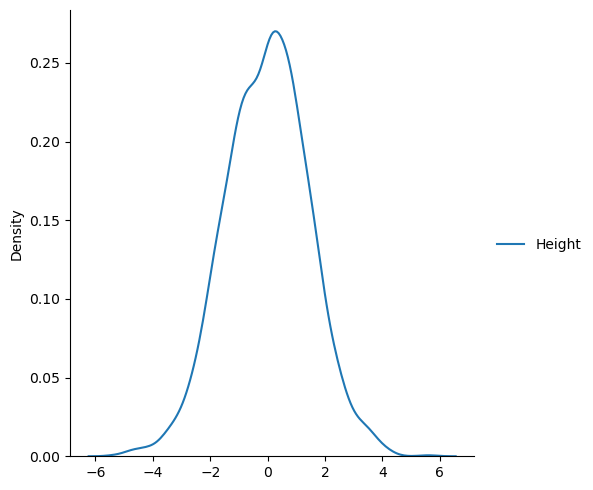

In [21]:
import seaborn as sns
sns.displot(residuals,kind="kde")

In [22]:
import pickle
pickle.dump(regressor,open("reg.pkl",'wb'))
pickle.dump(scaler,open("scl.pkl",'wb'))